## Utkarsha Vidhale

# Wine quality analysis

Dataset : https://archive.ics.uci.edu/ml/datasets/wine+quality

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

[Libraries used](#a1) 


[Reading the data](#a2) 


[Relating variables](#a3)




<a id="a1"></a>
## Libraries used:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

<a id="a2"></a>
## Reading the data:
#### 1. White wine data

In [3]:
white = pd.read_csv('white.csv',sep=';')
#red = pd.read_csv('red.csv',sep=';')
white.head()
#red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.2 KB


Adding column "color" to specify wine color

In [5]:
# set white as color
white["color"] = "white"

In [6]:
white.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,NaN
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,NaN
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,NaN
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,NaN


#### 1. Red wine data

In [7]:
red = pd.read_csv('red.csv',sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Adding column "color" to specify wine color

In [9]:
# set white as color
red["color"] = "red"

In [10]:
red.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1599
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,NaN


### Merging the red and white wine dataframes:

In [11]:
data_wine = white.append(red, ignore_index = True)

In [12]:
data_wine.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN


### Understanding Target Variable

In [13]:
data_wine.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Target variable/Dependent variable is discrete and categorical in nature.
"quality" score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
1,2 & 10 Quality ratings are not given by any obseravtion.Only scores obtained are between 3 to 9.

In [14]:
data_wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

This tells us vote count of each quality score in descending order.
"quality" has most values concentrated in the categories 5, 6 and 7.
Only a few observations made for the categories 3 & 9

##### The variable 'quality' is an ordinal value with score between 0 and 10

### Wine 'quality' as : good or bad:
The quality of wine is defined as good or bad based on :
 
score <= 6 : bad 
 
Score > 6 : good 
 
The column 'quality' is replaced by 'qual_bool'.

In [15]:
data_wine['qual_bool'] = np.where(data_wine['quality']<=6, 0, 1).astype(bool)


data_wine.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,qual_bool
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898,5220
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN,NaN


In [16]:
data_wine['col_bool'] = np.where(data_wine['color']=='red', 0, 1).astype(bool)
data_wine.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,qual_bool,col_bool
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497,6497,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898,5220,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN,NaN,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN,NaN,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN,NaN,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN,NaN,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN,NaN,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN,NaN,NaN


#### Checking null values

In [17]:
data_wine1=data_wine.drop(['quality'], axis=1)
data_wine1=data_wine1.drop(['color'], axis=1)
data_wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  qual_bool             6497 non-null   bool   
 12  col_bool              6497 non-null   bool   
dtypes: bool(2), float64(11)
memory usage: 571.1 KB


In [18]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  qual_bool             6497 non-null   bool   
 14  col_bool              6497 non-null   bool   
dtypes: bool(2), float64(1

In [19]:
data_wine.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,qual_bool,col_bool
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497,6497,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4898,5220,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,NaN,NaN,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,NaN,NaN,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,NaN,NaN,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,NaN,NaN,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,NaN,NaN,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,NaN,NaN,NaN


<a id="a3"></a>
## Relating variables
 
check the correlation between the variables
compute the correlation matrix 

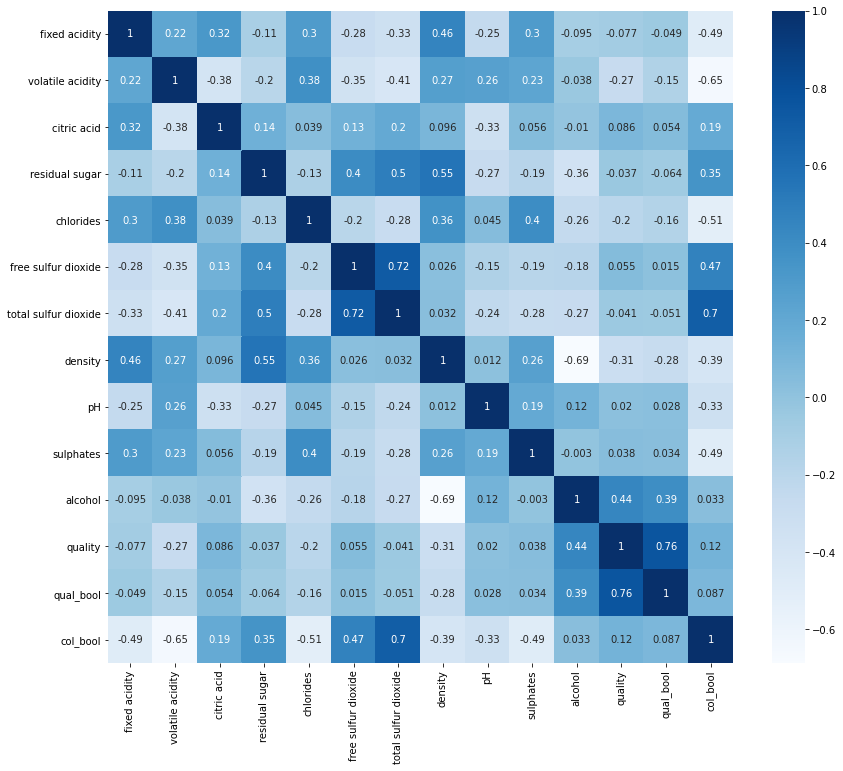

In [20]:
correlation_matrix = data_wine.corr()
figure = plt.figure(figsize = (14,12))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

Lets focus on our target variable, `qual_bool`. 

### Checking for outliers

In [21]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  qual_bool             6497 non-null   bool   
 14  col_bool              6497 non-null   bool   
dtypes: bool(2), float64(1

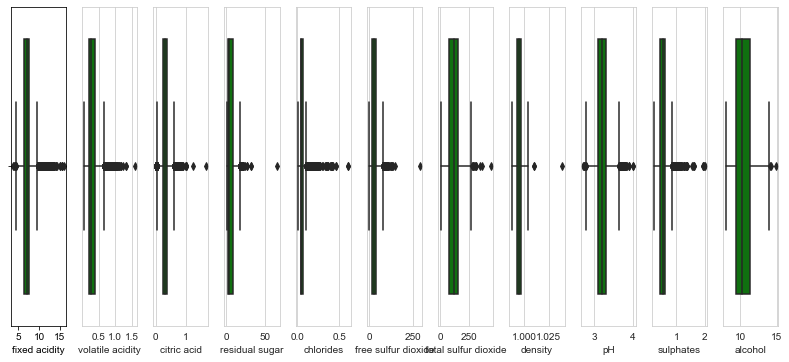

In [22]:
##Outliers in dataset
df = data_wine.drop(columns=['qual_bool','col_bool','quality','color'])

l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

Except "alcohol" all other features columns shows outliers. '''Color Codes : https://matplotlib.org/examples/color/colormaps_reference.html'''

### Checking distribution skewness

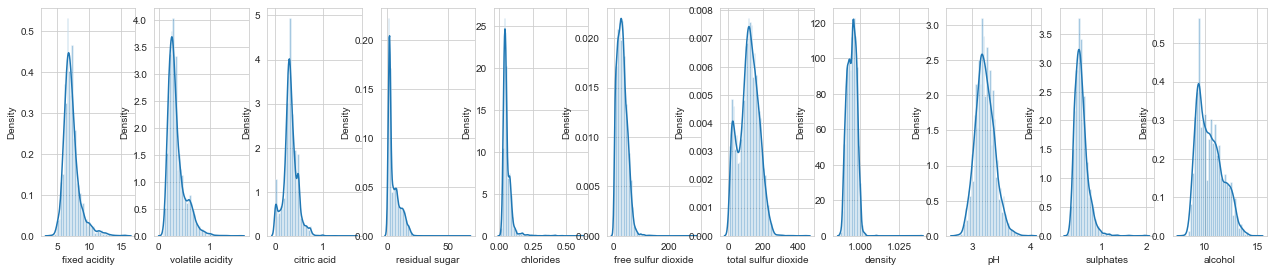

In [23]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

"pH" column appears to be normally distributed
remaining all independent variables are right skewed/positively skewed.

### Normalization

### Catplots to understand quality of wine 
 
Catplots : https://seaborn.pydata.org/generated/seaborn.catplot.html
 
Swarmplots : http://seaborn.pydata.org/tutorial/categorical.html?highlight=panel%20data 
 

#### 1. Relating 'quality' and 'fixed acidity'

Text(0.5, 1.0, 'Wine Quality as explained by Fixed Acidity')

<Figure size 720x432 with 0 Axes>

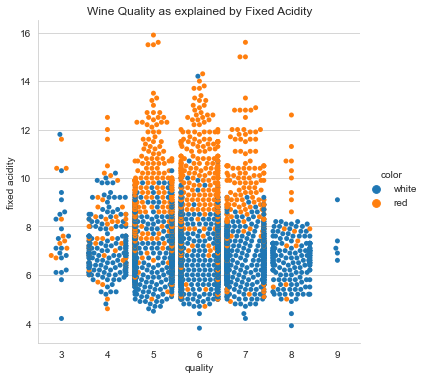

In [24]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed acidity", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Fixed Acidity")

We can observe the spread of 'red' and 'white' wine quality as per the fixed acidity in the wine.  
 
Max fixed acidity = 15.90
 
Red wine with high quality score (above 7) do not have fixed acidity more than 14.
 
White wine with good quality score (above 6) do not have fixed acidity more than 10.

The amount of fixed acidity in white wine is comparitively less than the same in red wine.




#### 2. Relating 'quality' and 'volatile acidity'

Text(0.5, 1.0, 'Wine Quality as explained by Volatile Acidity')

<Figure size 720x432 with 0 Axes>

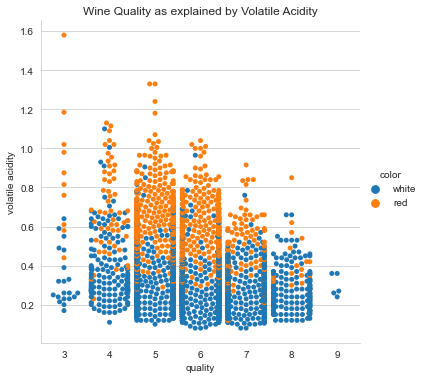

In [25]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="volatile acidity", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Volatile Acidity")

Max volatile acidity = 1.58 
 
Min volatile acidity = 0.08 

The higher quality of wine has comparitavely less (< 0.8) volatile acidity. 
 
As compared to good quality red and white wine, the level of volatile acidity is comparitavely less in white wine.      

#### 3. Relating 'quality' and 'citric acid'

Text(0.5, 1.0, 'Wine Quality as explained by Citric Acid')

<Figure size 720x432 with 0 Axes>

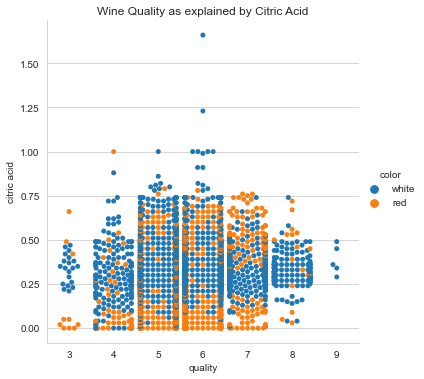

In [26]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="citric acid", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Citric Acid")

Max Citric Acid:
Min Citric Acid:



#### 4. Relating 'quality' and 'residual sugar'

Text(0.5, 1.0, 'Wine Quality as explained by Residual Sugar')

<Figure size 720x432 with 0 Axes>

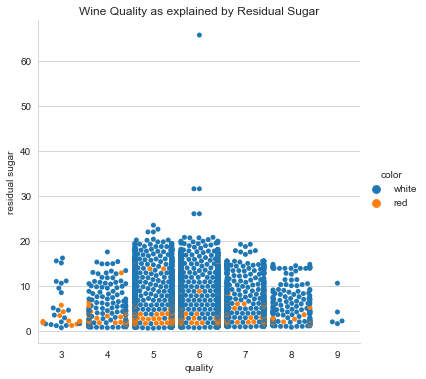

In [27]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="residual sugar", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Residual Sugar")

Max Residual Sugar: 65.80
 
Min Residual Sugar: 0.60
 
For a good quality of wine, the residual sugar is usually low. 

The amount of residual sugar in red wine is less than that of in white wine.



#### 5. Relating 'quality' and 'chlorides'

Text(0.5, 1.0, 'Wine Quality as explained by chlorides')

<Figure size 720x432 with 0 Axes>

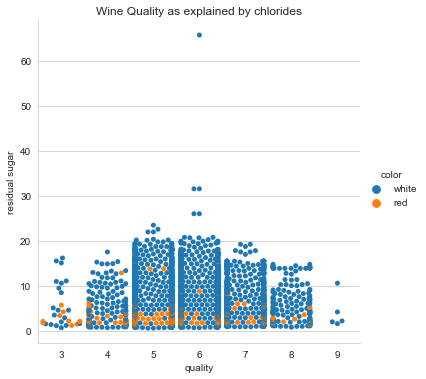

In [28]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="residual sugar", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by chlorides")

Explaination

#### 6. Relating 'quality' and 'free sulfur dioxide'

Text(0.5, 1.0, 'Wine Quality as explained by Free Sulfur Dioxide')

<Figure size 720x432 with 0 Axes>

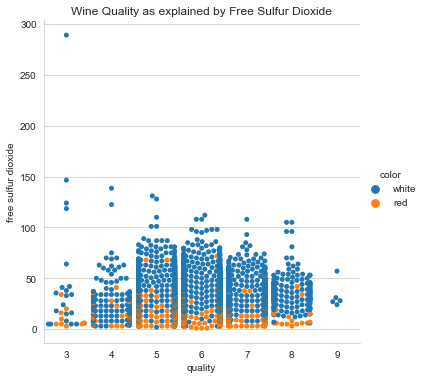

In [29]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="free sulfur dioxide", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Free Sulfur Dioxide")

Explaination

#### 7. Relating 'quality' and 'total sulfur dioxide'

Text(0.5, 1.0, 'Wine Quality as explained by Total Sulfur Dioxide')

<Figure size 720x432 with 0 Axes>

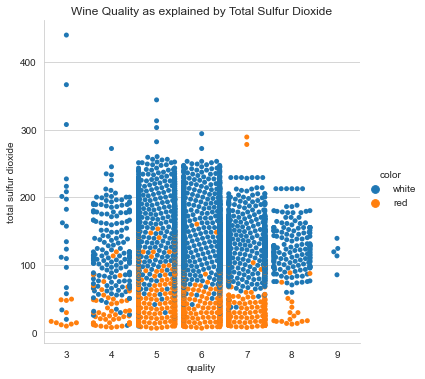

In [30]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="total sulfur dioxide", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Total Sulfur Dioxide")

Explaination

#### 8. Relating 'quality' and 'density'

Text(0.5, 1.0, 'Wine Quality as explained by Density')

<Figure size 720x432 with 0 Axes>

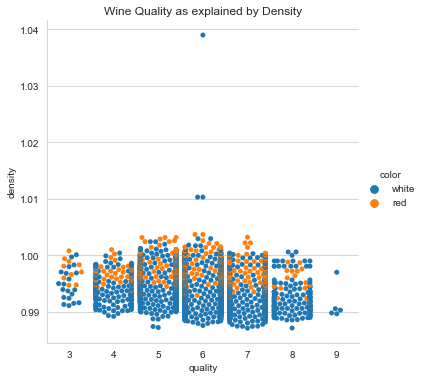

In [31]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="density", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Density")

Explaination

#### 9. Relating 'quality' and 'pH'

Text(0.5, 1.0, 'Wine Quality as explained by pH')

<Figure size 720x432 with 0 Axes>

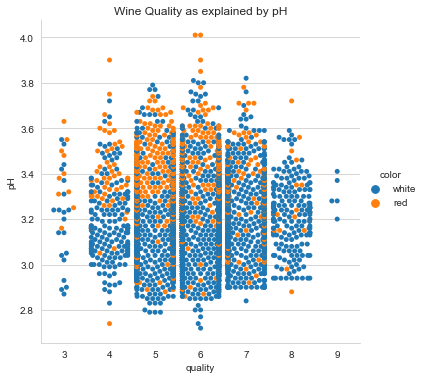

In [32]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="pH", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by pH")

Explaination

#### 10. Relating 'quality' and 'sulphates'

Text(0.5, 1.0, 'Wine Quality as explained by Sulphates')

<Figure size 720x432 with 0 Axes>

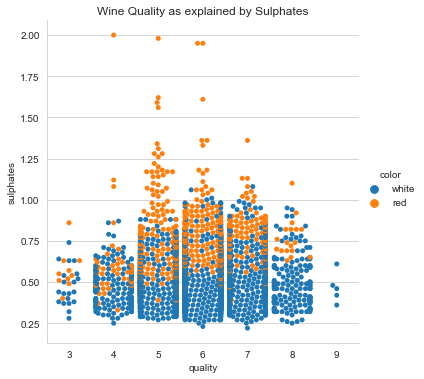

In [33]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="sulphates", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by Sulphates")

Explaination

#### 11. Relating 'quality' and 'alcohol'

Text(0.5, 1.0, 'Wine Quality as explained by alcohol')

<Figure size 720x432 with 0 Axes>

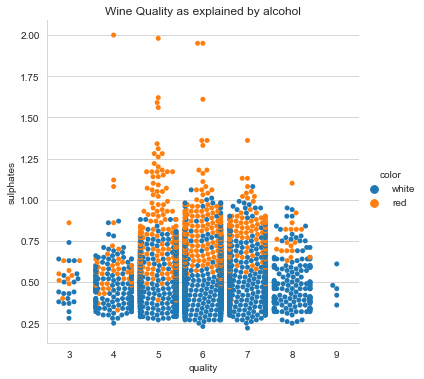

In [34]:
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="sulphates", hue="color", kind="swarm", data=data_wine)
plt.title("Wine Quality as explained by alcohol")

Explaination

In [35]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  qual_bool             6497 non-null   bool   
 14  col_bool              6497 non-null   bool   
dtypes: bool(2), float64(1

In [36]:
## splitting data
X = data_wine[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].copy()
Y= data_wine[['quality']].copy()

In [37]:
lr = LinearRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [38]:
m1 =lr.fit(X_train[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']],Y_train)

In [40]:
m1_pred_train = m1.predict(X_train[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

In [41]:
m1_pred_test = m1.predict(X_test[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

In [42]:
print('Training Data RMSE of model_1:',metrics.mean_squared_error(Y_train,m1_pred_train))
print('Test Data     RMSE of model_1:',metrics.mean_squared_error(Y_test,m1_pred_test))

Training Data RMSE of model_1: 0.5497941526632354
Test Data     RMSE of model_1: 0.517243544732748


##### Without 'volatile acidity'

In [43]:
m2 = lr.fit(X_train[['fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']],Y_train)

In [44]:
m2_pred_train = m2.predict(X_train[['fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

In [45]:
m2_pred_test = m2.predict(X_test[['fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

In [46]:
print('Training Data RMSE of model_2:',metrics.mean_squared_error(Y_train,m2_pred_train))
print('Test Data     RMSE of model_2:',metrics.mean_squared_error(Y_test,m2_pred_test))

Training Data RMSE of model_2: 0.5760971870226884
Test Data     RMSE of model_2: 0.5376128281783868


##### Without 'chlorides'

In [47]:
m3 = lr.fit(X_train[['fixed acidity','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']],Y_train)
m3_pred_train = m2.predict(X_train[['fixed acidity','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
m3_pred_test = m2.predict(X_test[['fixed acidity','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

In [48]:
print('Training Data RMSE of model_3:',metrics.mean_squared_error(Y_train,m3_pred_train))
print('Test Data     RMSE of model_3:',metrics.mean_squared_error(Y_test,m3_pred_test))

Training Data RMSE of model_3: 0.577880376307679
Test Data     RMSE of model_3: 0.5399172422827372


NO change 

#### Without 'density'

In [49]:
m4 = lr.fit(X_train[['fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']],Y_train)
m4_pred_train = m4.predict(X_train[['fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']])
m4_pred_test = m4.predict(X_test[['fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']])

In [50]:
print('Training Data RMSE of model_4:',metrics.mean_squared_error(Y_train,m4_pred_train))
print('Test Data     RMSE of model_4:',metrics.mean_squared_error(Y_test,m4_pred_test))

Training Data RMSE of model_4: 0.5876835464257489
Test Data     RMSE of model_4: 0.5463313917656853


##### Without 'residual sugar'

In [51]:
m5 = lr.fit(X_train[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']],Y_train)
m5_pred_train = m4.predict(X_train[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']])
m5_pred_test = m4.predict(X_test[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']])

In [52]:
print('Training Data RMSE of model_5:',metrics.mean_squared_error(Y_train,m5_pred_train))
print('Test Data     RMSE of model_5:',metrics.mean_squared_error(Y_test,m5_pred_test))

Training Data RMSE of model_5: 0.5940584372190587
Test Data     RMSE of model_5: 0.5513541467802775


##### Without 'sulphates'

In [53]:
m6 = lr.fit(X_train[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','pH','alcohol']],Y_train)
m6_pred_train = m4.predict(X_train[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','pH','alcohol']])
m6_pred_test = m4.predict(X_test[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','pH','alcohol']])

In [54]:
print('Training Data RMSE of model_6:',metrics.mean_squared_error(Y_train,m6_pred_train))
print('Test Data     RMSE of model_6:',metrics.mean_squared_error(Y_test,m6_pred_test))

Training Data RMSE of model_6: 0.5998347971450191
Test Data     RMSE of model_6: 0.5597679937065354


NO change

##### Without pH

In [55]:
m7 = lr.fit(X_train[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','alcohol']],Y_train)
m7_pred_train = m4.predict(X_train[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','alcohol']])
m7_pred_test = m4.predict(X_test[['fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','alcohol']])

In [56]:
print('Training Data RMSE of model_7:',metrics.mean_squared_error(Y_train,m7_pred_train))
print('Test Data     RMSE of model_7:',metrics.mean_squared_error(Y_test,m7_pred_test))

Training Data RMSE of model_7: 0.5998406951471249
Test Data     RMSE of model_7: 0.5597777554261565


NO change

##### Without 'total sulfur dioxide'

In [57]:
m8 = lr.fit(X_train[['fixed acidity','citric acid','chlorides','free sulfur dioxide','alcohol']],Y_train)
m8_pred_train = m4.predict(X_train[['fixed acidity','citric acid','chlorides','free sulfur dioxide','alcohol']])
m8_pred_test = m4.predict(X_test[['fixed acidity','citric acid','chlorides','free sulfur dioxide','alcohol']])

In [58]:
print('Training Data RMSE of model_8:',metrics.mean_squared_error(Y_train,m8_pred_train))
print('Test Data     RMSE of model_8:',metrics.mean_squared_error(Y_test,m8_pred_test))

Training Data RMSE of model_8: 0.6020595412249031
Test Data     RMSE of model_8: 0.5644857899440101
